## GPU Test

torch.cuda.is_available()

In [2]:
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 1650 Ti'

## Importing necessary Libraries

In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

## Dataset

In [13]:
real = r"C:\dataset\real"
fake = r"C:\dataset\fake"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [14]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (96, 96))
    return image[...,::-1]

In [17]:
dataset_path = r"C:\dataset"

## Data Preprocessing

In [42]:
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=False, rescale=1./255,)

In [18]:
train = train_datagen.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32)

Found 2041 images belonging to 2 classes.


In [19]:
x, y = next(train)

## Defining the Model

In [21]:
ResNet = ResNet50(input_shape=(96, 96, 3),
                          include_top=False,
                          weights='imagenet'
                          )

average_layer = GlobalAveragePooling2D()

model = Sequential([
    ResNet,
    average_layer,
    Dense(256, activation=tf.nn.relu),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation=tf.nn.softmax)
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [23]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Fuzail\miniconda3\envs\myenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

## Training the Model

In [25]:
model.fit_generator(train,
                    epochs=40,
                    callbacks=[lr_callbacks])

C:\Users\Fuzail\AppData\Local\Temp\ipykernel_18780\1637203345.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,


Epoch 1/40
64/64 [==============================] - 54s 638ms/step - loss: 0.8926 - accuracy: 0.5605 - lr: 0.0010
Epoch 2/40
64/64 [==============================] - 24s 375ms/step - loss: 0.6876 - accuracy: 0.6242 - lr: 0.0010
Epoch 3/40
64/64 [==============================] - 24s 370ms/step - loss: 0.6857 - accuracy: 0.6526 - lr: 0.0010
Epoch 4/40
64/64 [==============================] - 24s 371ms/step - loss: 0.6278 - accuracy: 0.6879 - lr: 1.0000e-04
Epoch 5/40
64/64 [==============================] - 24s 367ms/step - loss: 0.5825 - accuracy: 0.7129 - lr: 1.0000e-04
Epoch 6/40
64/64 [==============================] - 24s 372ms/step - loss: 0.5651 - accuracy: 0.7295 - lr: 1.0000e-04
Epoch 7/40
64/64 [==============================] - 24s 372ms/step - loss: 0.5266 - accuracy: 0.7506 - lr: 1.0000e-04
Epoch 8/40
64/64 [==============================] - 24s 370ms/step - loss: 0.4816 - accuracy: 0.7756 - lr: 1.0000e-04
Epoch 9/40
64/64 [==============================] - 24s 368ms/step -

## Saving the Model

In [26]:
model.save("detector_model.h5")

In [27]:
model.evaluate_generator(train)

C:\Users\Fuzail\AppData\Local\Temp\ipykernel_18780\168570560.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train)


[0.04029407724738121, 0.9911807775497437]

## Result

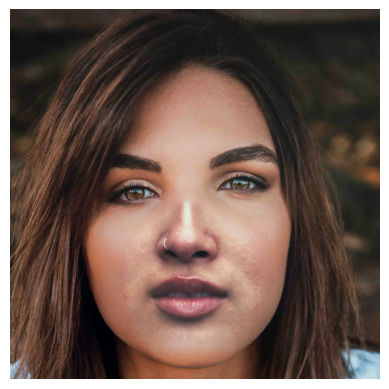

1/1 [==============================] - 1s 763ms/step
The image is classified as Fake


In [40]:
model = tf.keras.models.load_model('detector_model.h5')

img_path = r"C:\dataset\fake\easy_158_0011.jpg"
img = image.load_img(img_path, target_size=(96, 96)) 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0 
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

predictions = model.predict(img_array)

if predictions[0][0] > 0.5:  
    result = "Fake"
else:
    result = "Real"

print(f"The image is classified as {result}")